## Ridge Regression

A simple example for ridge regression. Please check [my blog](http://yueyublog.com/posts/regularization-for-least-squares)
for more details.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

Load and plot the dataset. The synthetic data was generated by $y = \sin x$ with random Gaussian noise.

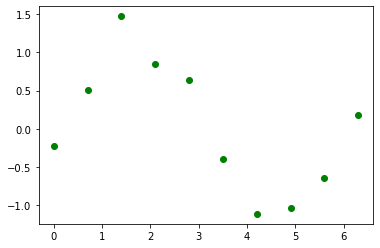

In [2]:
D = np.loadtxt('data/train.csv', delimiter=',', skiprows=1)
X_train, y_train = D[:, 1:], D[:, 0]

plt.plot(X_train, y_train, 'go')

Apply the polynomial basis function to the input features.

In [3]:
def get_Phi(X, degree):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)


Phi_train = get_Phi(X_train, degree=9)

### 1. Basic Linear Regression

Suppose we want to fit a nine-degree polynomial function to the dataset.

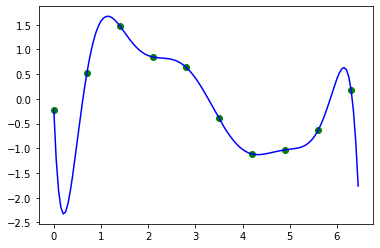

In [4]:
def fit(Phi, y):
    return np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y


# Learn the optimal w
w_star = fit(Phi_train, y_train)

# Plot the function
X_test = np.arange(0, 6.5, 0.05).reshape((-1, 1))
Phi_test = get_Phi(X_test, degree=9)
y_test = Phi_test @ w_star

plt.figure()
plt.plot(X_train, y_train, 'go')
plt.plot(X_test, y_test, color='b')
plt.show()

In this case, overfitting occurs.

### 2. Ridge Regression

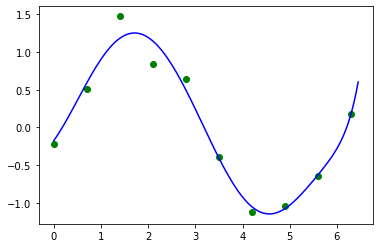

In [5]:
def fit_ridge(Phi, y, lambd=0.05):
    _, M = Phi.shape
    lambd_I = np.diag(np.full(M, lambd))
    return np.linalg.inv(lambd_I + Phi.T @ Phi) @ Phi.T @ y


# Learn the optimal w
w_star_ridge = fit_ridge(Phi_train, y_train)

# Plot the function
X_test = np.arange(0, 6.5, 0.05).reshape((-1, 1))
Phi_test = get_Phi(X_test, degree=9)
y_test = Phi_test @ w_star_ridge

plt.figure()
plt.plot(X_train, y_train, 'go')
plt.plot(X_test, y_test, color='b')
plt.show()

We can see that regularization mitigated the overfitting problem, and our model looks quite similar to the sine function
we used to generate the data.